<a href="https://colab.research.google.com/github/Tmmfaris/TestGibTm/blob/main/Case_Study_on_Preprocessing(01_01_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

##Dataset Overview

In [52]:
House_Pricing = pd.read_csv('/content/House_Pricing.csv')
House_Pricing.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [53]:
House_Pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [54]:
House_Pricing.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [55]:
House_Pricing.shape

(21613, 21)

##Duplicate Removal

Rows: Check for duplicate rows in the dataset, if any, and remove them.

In [56]:
House_Pricing.duplicated().sum()

np.int64(0)

In [57]:
House_Pricing_cleaned = House_Pricing.drop_duplicates()

In [58]:
House_Pricing.shape

(21613, 21)

Columns: Identify and drop duplicate columns, if any, based on their values.

In [59]:
House_Pricing.T.duplicated()

,0
ID,False
Date House was Sold,False
Sale Price,False
No of Bedrooms,False
No of Bathrooms,False
Flat Area (in Sqft),False
Lot Area (in Sqft),False
No of Floors,False
Waterfront View,False
No of Times Visited,False


In [60]:
House_Pricing.shape

(21613, 21)

##Handling Missing Values

In [61]:
House_Pricing.dropna(subset=['Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)'], inplace=True)

Identify missing values in each column.

In [62]:
missing_values = House_Pricing.isna().sum()
missing_values

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19485


In [63]:
# Display only columns with missing values
missing_values[missing_values > 0]

,0
Sale Price,4
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Times Visited,19485
Area of the House from Basement (in Sqft),3


Handle missing values:

For numerical columns, use imputation techniques like mean/median imputation.

In [64]:
# Select numerical columns
numerical_cols = House_Pricing.select_dtypes(include=["int64", "float64"])

In [65]:
# Impute missing values using median (no for-loop)
House_Pricing[numerical_cols.columns] = numerical_cols.fillna(numerical_cols.median())

In [66]:
# Verify missing values after imputation
House_Pricing[numerical_cols.columns].isnull().sum()

,0
ID,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Overall Grade,0
Area of the House from Basement (in Sqft),0
Basement Area (in Sqft),0


For categorical columns, fill with mode.

In [67]:
House_Pricing['No of Times Visited'] = House_Pricing['No of Times Visited'].fillna(House_Pricing['No of Times Visited'].mode()[0])

In [68]:
# Verify missing values after imputation
House_Pricing.isnull().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,0


##Outlier Removal

Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).

In [69]:
# Select numerical columns
num_cols = House_Pricing.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [70]:
outlier_summary = {}

for col in num_cols:
    # Calculate Q1, Q3, IQR using np.percentile
    Q1 = np.percentile(House_Pricing[col], 25)
    Q3 = np.percentile(House_Pricing[col], 75)
    IQR = Q3 - Q1

    up_val = Q3 + 1.5 * IQR
    low_val = Q1 - 1.5 * IQR

    # Count outliers using for-loop
    count = 0
    for x in House_Pricing[col]:
        if x > up_val or x < low_val:
            count += 1

    outlier_summary[col] = count

# Display result
outlier_summary

{'ID': 0,
 'Sale Price': 1159,
 'No of Bedrooms': 546,
 'No of Bathrooms': 571,
 'Flat Area (in Sqft)': 572,
 'Lot Area (in Sqft)': 2423,
 'No of Floors': 0,
 'Overall Grade': 1911,
 'Area of the House from Basement (in Sqft)': 610,
 'Basement Area (in Sqft)': 496,
 'Age of House (in Years)': 0,
 'Renovated Year': 913,
 'Zipcode': 0,
 'Latitude': 2,
 'Longitude': 256,
 'Living Area after Renovation (in Sqft)': 544,
 'Lot Area after Renovation (in Sqft)': 2193}

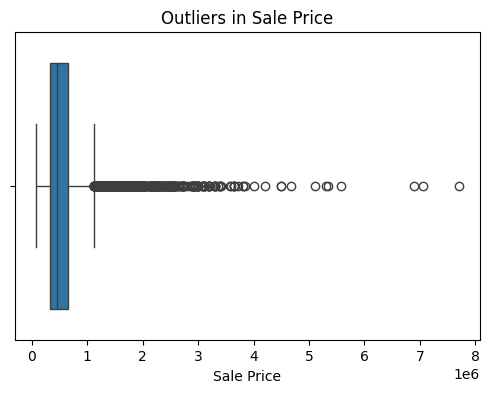

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(x=House_Pricing['Sale Price'])
plt.title("Outliers in Sale Price")
plt.show()

Remove outliers from these features if they are not representative of typical house prices.

In [72]:
# Features where extreme values are not representative
features_to_clean = [
    "Sale Price",
    "Flat Area (in Sqft)",
    "Lot Area (in Sqft)",
    "Living Area after Renovation (in Sqft)",
    "Lot Area after Renovation (in Sqft)"
]

# Apply IQR-based outlier removal
House_Pricing_cleaned = House_Pricing.copy()

for col in features_to_clean:
    Q1 = House_Pricing_cleaned[col].quantile(0.25)
    Q3 = House_Pricing_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    House_Pricing_cleaned = House_Pricing_cleaned[
        (House_Pricing_cleaned [col] >= lower_bound) &
        (House_Pricing_cleaned [col] <= upper_bound)
    ]

# Dataset size comparison
print("Original shape:", House_Pricing.shape)
print("After outlier removal:", House_Pricing_cleaned.shape)

Original shape: (21609, 21)
After outlier removal: (17255, 21)


##Scaling Numerical Variables

Identify all numerical columns (excluding the target variable SalePrice)

In [73]:
# Identify numerical columns
num_cols = House_Pricing.select_dtypes(include=["int64", "float64"]).columns

# Exclude target variable
num_features = num_cols.drop("Sale Price")

num_features

Index(['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

Scale these features using techniques like Min-Max scaling or Standard scaling

In [74]:
# Initialize Standard Scaler
sscaler = StandardScaler()

# Apply scaling
House_Pricing_cleaned[num_features] = sscaler.fit_transform(House_Pricing_cleaned[num_features])

In [75]:
# Initialize Min-Max Scaler
mscaler = MinMaxScaler()

# Apply scaling
House_Pricing_cleaned[num_features] = mscaler.fit_transform(House_Pricing_cleaned[num_features])

##Encoding Categorical Variables

Identify all categorical columns in the dataset

In [76]:
# Identify categorical columns
categorical_cols = House_Pricing_cleaned.select_dtypes(include=["object"]).columns

categorical_cols

Index(['Date House was Sold', 'Waterfront View', 'No of Times Visited',
       'Condition of the House'],
      dtype='object')

Apply appropriate encoding techniques:

Use One-Hot Encoding for nominal categories.

In [77]:
# Apply One-Hot Encoding
House_Pricing_encoded = pd.get_dummies(House_Pricing_cleaned,
                                       columns=categorical_cols,
                                       drop_first=True)

print("Shape after One-Hot Encoding:", House_Pricing_encoded.shape)

Shape after One-Hot Encoding: (17255, 37)


Use Label Encoding for ordinal categories, if applicable

In [78]:
from sklearn.preprocessing import LabelEncoder

# Create a copy
House_Pricing_encoded = House_Pricing_cleaned.copy()

# Define ordinal mapping
condition_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Excellent": 5
}

# Apply ordinal encoding
House_Pricing_encoded["Condition of the House"] = (House_Pricing_encoded["Condition of the House"].map(condition_mapping))

In [79]:
le = LabelEncoder()
House_Pricing_encoded["Condition of the House"] = le.fit_transform(House_Pricing_cleaned["Condition of the House"])

##Train-Test Split


Set aside the SalePrice column as the target variable

In [80]:
# Separate target variable
X = House_Pricing_encoded.drop(columns=['Sale Price'])  # Features
y = House_Pricing_encoded['Sale Price']                 # Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (17255, 20)
Target shape: (17255,)


Split the dataset into training (80%) and testing (20%) sets using the train_test_split function from sklearn

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13804, 20)
X_test shape: (3451, 20)
y_train shape: (13804,)
y_test shape: (3451,)
